# Additional exercise 2
A scientific instrument installed on the International Space Station is kept at a low temperature by means of a liquid cooling system. The average temperature measured every day for 40 consecutive days are reported in 'ESE4_add_ex2.csv'. From day 18 to day 22 the instrument was used for some extra experiments, whereas normal operating conditions were applied in all the remaining days.  

Identify a suitable model.

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

# Import the dataset
data = pd.read_csv('ESE4_add_ex2.csv')

# Inspect the dataset
data.head()

,Temp
0,6.00
1,5.80
2,6.10
3,5.15
4,5.02


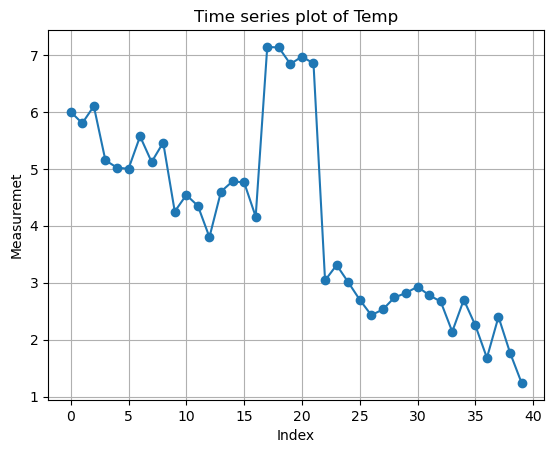

In [2]:
# Plot the data 
plt.plot(data['Temp'], 'o-')
plt.xlabel('Index')
plt.ylabel('Measuremet')
plt.title('Time series plot of Temp')
plt.grid()
plt.show()

Runs test p-value = 0.000


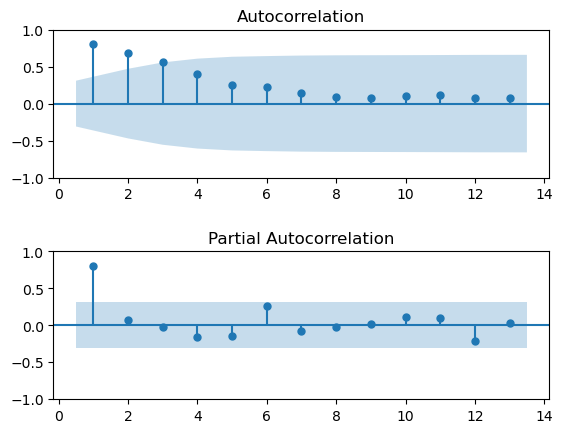

In [3]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data['Temp'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))

# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['Temp'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['Temp'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()

> There is a trend, with a jump in the middle for days 18-22.

> Let's try to fit a model with a dummy variable that is non-null just for days 18-22. Create a model in the form:

> $$ X_t = \beta_0 + \beta_1 day + \beta_2 𝑑𝑢𝑚𝑚𝑦+ \epsilon_t $$

In [4]:
#create dummy variable
data['dummy'] = np.zeros(len(data))
data['dummy'][17:22] = 1

#create day of week variable
data['Day'] = np.arange(1, len(data)+1)

In [5]:
import statsmodels.api as sm
import qda

x = data[['Day', 'dummy']]
x = sm.add_constant(x) 
y = data['Temp']
model = sm.OLS(y, x).fit()
qda.summary(model)

REGRESSION EQUATION
-------------------
Temp =  + 5.886 const -0.106 Day + 3.222 dummy

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const  5.8865   0.1175  50.1108 1.3022e-35
  Day -0.1061   0.0049 -21.6762 1.2642e-22
dummy  3.2225   0.1709  18.8533 1.4522e-20

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.3575 0.9578     0.9555

ANALYSIS OF VARIANCE
---------------------
    Source   DF   Adj SS   Adj MS   F-Value    P-Value
Regression  2.0 107.1974  53.5987  419.4561 3.7689e-26
     const  1.0 320.8704 320.8704 2511.0885 1.3022e-35
       Day  1.0  60.0391  60.0391  469.8581 1.2642e-22
     dummy  1.0  45.4197  45.4197  355.4482 1.4522e-20
     Error 37.0   4.7279   0.1278       NaN        NaN
     Total 39.0 111.9253      NaN       NaN        NaN


Shapiro-Wilk test p-value on the residuals = 0.326
Runs test p-value on the residuals = 0.112


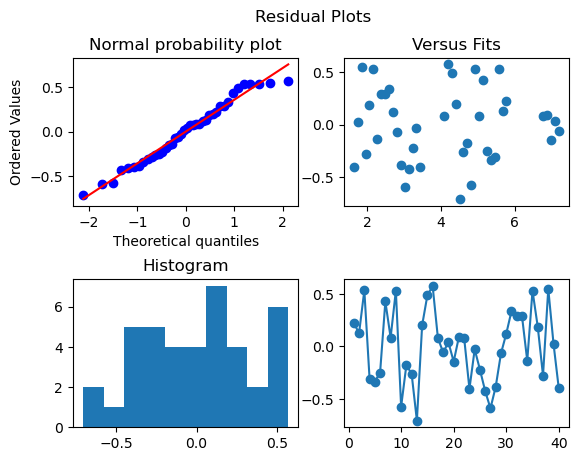

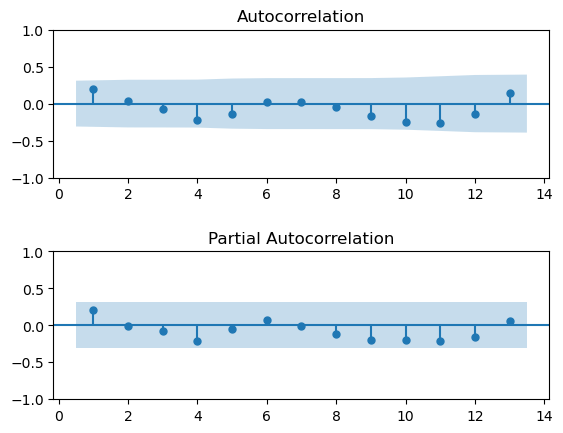

In [6]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

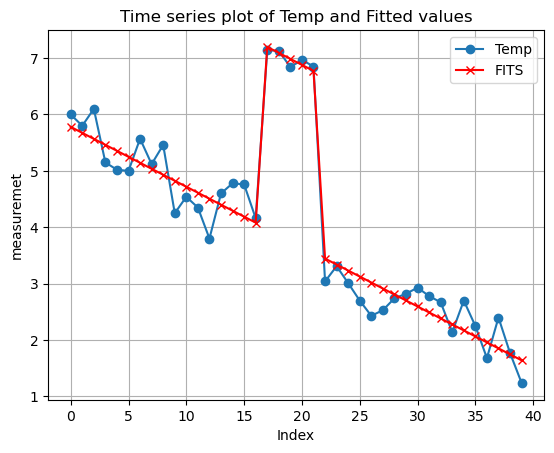

In [7]:
# Plot the data 
plt.plot(data['Temp'], 'o-', label = 'Temp')
plt.plot(model.fittedvalues, 'x-r', label = 'FITS')
plt.xlabel('Index')
plt.ylabel('measuremet')
plt.legend()
plt.title('Time series plot of Temp and Fitted values')
plt.grid()
plt.show()